# Example: Cross scoring

In case you have not downloaded and imported a reference panel yet, open a terminal and execute in the PascalX/misc folder:

```bash get1KGGRCh38.sh /yourfolder/ EUR```

This command will download and plink convert 1KG project data for the european subpolulation. The data will be stored in ```/yourfolder/```. 

#### Load the coherence scorer:

In [1]:
from PascalX import xscorer

Xscorer = xscorer.zsum(window=50000,varcutoff=0.99)

#### Load the reference panel into the genescorer:


In [2]:
Xscorer.load_refpanel('/yourfolder/EUR.1KGphase3.GRCh38',parallel=1)

The first time this command is executed for a reference panel, an internal SNP database will be generated on disk. This process may take several hours. You can use the ```parallel=``` option to speed up via parallelization. Subsequent calls of this method will be very fast.

#### Load a gene annotation:

If you do not have a gene annotation yet, you can download automatically from BioMart via

In [3]:
from PascalX.genome import genome

G = genome()
G.get_ensembl_annotation('biomart_GRCh38.tsv')

done


The annotation will be saved in the file ```biomart_GRCh38.tsv```. 

You still need to load the annotation into the genescorer as follows:

In [3]:
Xscorer.load_genome('biomart_GRCh38.tsv')

18497 active genes


#### Load two GWAS:

In [4]:
Xscorer.load_GWAS("path/gwasfilename_A",name='COVID19_A2_ALL',rscol=12,pcol=8,bcol=6,a1col=3,a2col=2,header=True)
Xscorer.load_GWAS("path/gwasfilename_B",name='M05B',rscol=0,pcol=6,bcol=4,a1col=1,a2col=2,header=True)

COVID19_A2_ALL 8120183 SNPs loaded ( min p: 1.128e-41 )
M05B 7253118 SNPs loaded ( min p: 3.1e-15 )


You can either load a raw text file or gzip compressed with file ending .gz

#### Uniformize the two GWAS:

In [5]:
Xscorer.matchAlleles('COVID19_A2_ALL','M05B',matchRefPanel=False)
Xscorer.jointlyRank('COVID19_A2_ALL','M05B')

5716982 common SNPs
15.87 % non-matching alleles        ->  907435 SNPs removed
0.0 % non-matching with ref panel ->  0 SNPs removed
4809547 shared SNPs ( min p: 2.08e-07 )


#### Start the scoring:

To score all genes in the loaded annotation, execute

In [6]:
R = Xscorer.score_all('COVID19_A2_ALL','M05B',parallel=2,nobar=True)

The raw results will be stored in ```R```. Use the ```parallel=``` option to increase the number of cpu cores to use (make sure that you have sufficient memory). Note that for ```parallel!=1``` it is recommended to switch off the progress bar via setting ```nobar=True```

The top scored genes can be listed via

In [7]:
Xscorer.get_topscores(N=10)

CCR3   3.316868335545564e-09
CCR1   8.176818777627659e-09
LZTFL1   2.691872191817879e-08
CCR2   1.744168219852682e-07
FYCO1   3.491516988862742e-07
CCR9   3.6708475348312675e-07
XCR1   8.052136841740776e-07
CXCR6   9.408073229355551e-07
CCR5   1.1105612576223223e-06
SLC6A20   2.8771437590169313e-06


[['CCR3', 3.316868335545564e-09],
 ['CCR1', 8.176818777627659e-09],
 ['LZTFL1', 2.691872191817879e-08],
 ['CCR2', 1.744168219852682e-07],
 ['FYCO1', 3.491516988862742e-07],
 ['CCR9', 3.6708475348312675e-07],
 ['XCR1', 8.052136841740776e-07],
 ['CXCR6', 9.408073229355551e-07],
 ['CCR5', 1.1105612576223223e-06],
 ['SLC6A20', 2.8771437590169313e-06]]

#### Visualisation:

18497 active genes


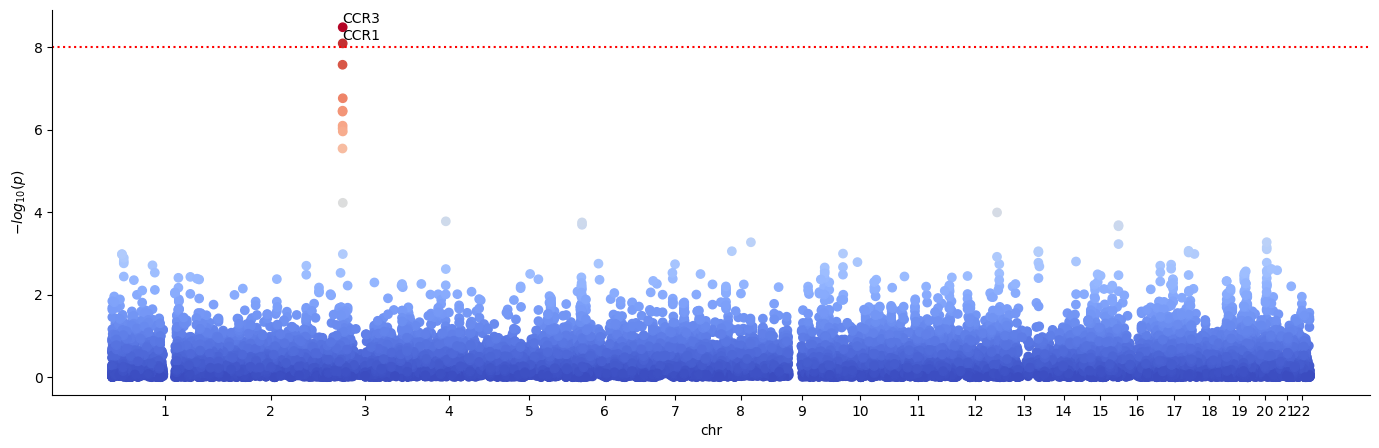

In [11]:
import matplotlib.pyplot as plt
from PascalX import genescorer
plt.figure(figsize=(17,5))

gscorer = genescorer.chi2sum()
gscorer.load_genome('biomart_GRCh38.tsv')
gscorer.plot_Manhattan(R[0],sigLine=1e-8,logsigThreshold=8,labelSig=True)